In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [2]:
# Define number of classes
train_classes = ['Azli','FordPresident','Jiang','Kapoor','Obama']

In [3]:
# Define data paths and image size
train_data_dir = r'C:\Users\US593\OneDrive\Desktop\visual-kinship-identification-in-forensics\data\train'
validation_data_dir = r'C:\Users\US593\OneDrive\Desktop\visual-kinship-identification-in-forensics\data\val'
test_data_dir = r'C:\Users\US593\OneDrive\Desktop\visual-kinship-identification-in-forensics\data\test'
img_width, img_height = 224, 224  

In [4]:
# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [5]:
# Freeze convolutional base layers (to prevent retraining these layers)
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Add new classification layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_classes), activation='softmax')(x)  # Adjust output size for your classes

In [7]:
# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [9]:
# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical'
)
validation_generator = ImageDataGenerator(rescale=1./255)
validation_generator = validation_generator.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 1583 images belonging to 5 classes.
Found 203 images belonging to 5 classes.
Found 151 images belonging to 5 classes.


In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust number of epochs
    validation_data=validation_generator
)

Epoch 1/10
50/50 [==============================] - 53s 950ms/step - loss: 0.9362 - accuracy: 0.6601 - val_loss: 0.4367 - val_accuracy: 0.8473
Epoch 2/10
50/50 [==============================] - 27s 535ms/step - loss: 0.4617 - accuracy: 0.8238 - val_loss: 0.4584 - val_accuracy: 0.8079
Epoch 3/10
50/50 [==============================] - 26s 519ms/step - loss: 0.3049 - accuracy: 0.8920 - val_loss: 0.3622 - val_accuracy: 0.8966
Epoch 4/10
50/50 [==============================] - 26s 525ms/step - loss: 0.2234 - accuracy: 0.9305 - val_loss: 0.3204 - val_accuracy: 0.8966
Epoch 5/10
50/50 [==============================] - 27s 544ms/step - loss: 0.1885 - accuracy: 0.9337 - val_loss: 0.3118 - val_accuracy: 0.8621
Epoch 6/10
50/50 [==============================] - 27s 527ms/step - loss: 0.1656 - accuracy: 0.9450 - val_loss: 0.2895 - val_accuracy: 0.8867
Epoch 7/10
50/50 [==============================] - 27s 528ms/step - loss: 0.1400 - accuracy: 0.9558 - val_loss: 0.3265 - val_accuracy: 0.8325

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

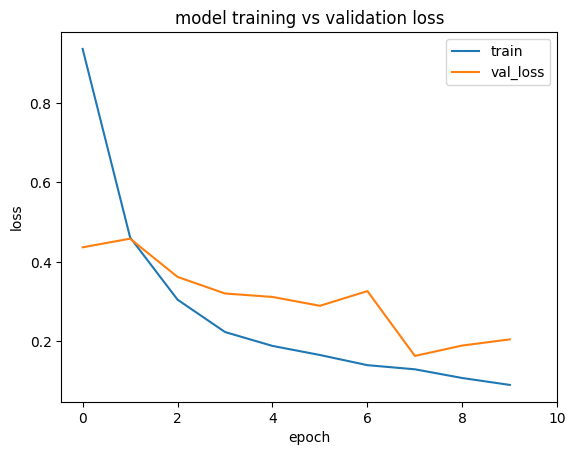

In [15]:
# model training evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 2))
plt.legend(['train','val_loss'])
plt.show()

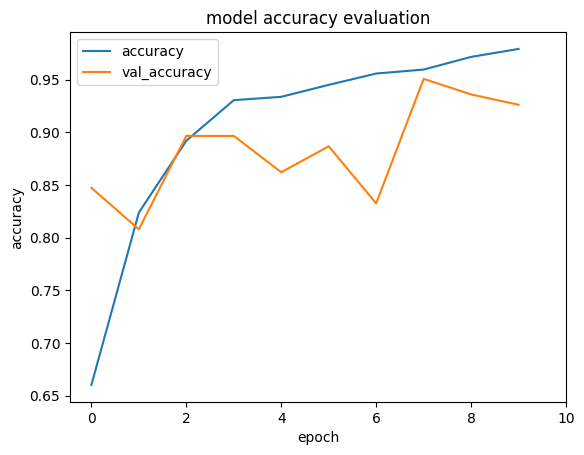

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy evaluation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 2))
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [17]:
model.evaluate(validation_generator)

7/7 [==============================] - 2s 220ms/step - loss: 0.2050 - accuracy: 0.9261


[0.20495547354221344, 0.9261083602905273]

In [18]:
model.evaluate(test_generator)

5/5 [==============================] - 5s 1s/step - loss: 0.4445 - accuracy: 0.8278


[0.4444606900215149, 0.8278145790100098]

In [19]:
model.save("model1.h5")